# Input Data and Model Preparation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sbn 
import sklearn
import tensorflow as tf

## Load the dataset

           Price  BikeFeature1  BikeFeature2
0     807.673876   1749.628226   1749.590668
1     959.227520   1748.007826   1751.824206
2     718.020033   1750.122967   1747.977026
3     945.668885   1749.916440   1750.771646
4     955.542968   1750.780519   1750.592430
..           ...           ...           ...
995   833.920637   1750.033229   1749.427281
996   800.298076   1747.996913   1750.035046
997   799.261737   1752.540381   1747.983310
998   705.802257   1751.349290   1747.484989
999  1048.892414   1748.656426   1752.539962

[1000 rows x 3 columns]


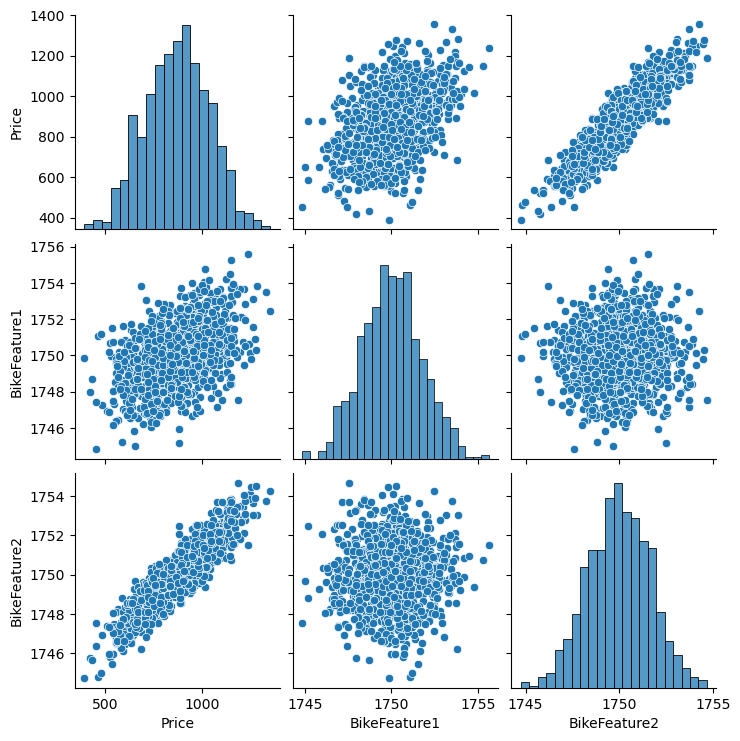

             Price  BikeFeature1  BikeFeature2
count  1000.000000   1000.000000   1000.000000
mean    872.677801   1750.024800   1749.964733
std     164.124504      1.704531      1.659578
min     390.856887   1744.852108   1744.742389
25%     757.795031   1748.831119   1748.803186
50%     879.168705   1750.017350   1750.003926
75%     988.612778   1751.115765   1751.129414
max    1355.213745   1755.613884   1754.666038


In [3]:
dataFrame = pd.read_excel("C:\\Users\\Arif Furkan\\OneDrive\\Belgeler\\Python_kullanirken\\bisiklet_fiyatlari.xlsx")
print(dataFrame)
sbn.pairplot(dataFrame)
plt.show()
print(dataFrame.describe())

## Split the data into Test/Train sets

In [4]:
from sklearn.model_selection import train_test_split
y = dataFrame["Price"].values
x = dataFrame[["BikeFeature1", "BikeFeature2"]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=18)

## Scaling (Transforming the size of the data)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Creating the model

In [6]:
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

## Define the model

In [7]:
model = Sequential([
    Dense(4, activation="relu", input_shape=(2,)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1)])

## Compile and train the model

In [8]:
model.compile(optimizer="rmsprop", loss="mse")
history = model.fit(x_train, y_train, epochs=250, verbose=0)

## Visualize and print the training loss

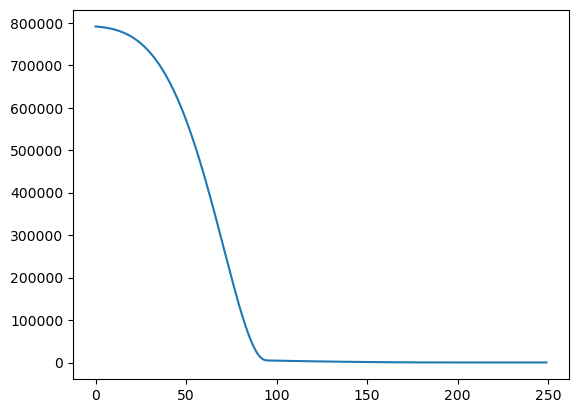

72.4959945678711
76.5151138305664


In [9]:
loss = history.history["loss"]
sbn.lineplot(x=range(len(loss)), y=loss)
plt.show()
trainLoss = model.evaluate(x_train, y_train, verbose=0)
testLoss = model.evaluate(x_test, y_test, verbose=0)
print(trainLoss)
print(testLoss)

## Test data predictions and actual values

In [10]:
testPredictions = model.predict(x_test)
print(testPredictions)

[[1054.8147 ]
 [ 557.6987 ]
 [ 953.36426]
 [ 838.31067]
 [ 977.42444]
 [ 731.70514]
 [ 693.4935 ]
 [ 897.462  ]
 [ 572.7929 ]
 [1122.1123 ]
 [ 603.12964]
 [ 851.6284 ]
 [1066.0825 ]
 [ 752.78784]
 [ 789.6912 ]
 [ 595.5626 ]
 [ 649.1201 ]
 [1059.0354 ]
 [ 662.98047]
 [1098.0728 ]
 [ 599.00415]
 [ 786.7254 ]
 [ 782.10095]
 [ 971.5314 ]
 [ 922.3335 ]
 [ 889.52405]
 [1036.6873 ]
 [ 846.2628 ]
 [1063.0864 ]
 [ 861.13275]
 [ 949.41846]
 [ 653.8363 ]
 [ 786.81555]
 [ 949.1504 ]
 [ 939.04626]
 [1155.0083 ]
 [ 683.01215]
 [ 822.33606]
 [ 829.5426 ]
 [1189.4255 ]
 [1103.5513 ]
 [ 822.66516]
 [ 956.52795]
 [ 649.33105]
 [1026.8066 ]
 [1099.0469 ]
 [1123.1165 ]
 [1115.0444 ]
 [1007.6968 ]
 [ 937.3471 ]
 [ 641.5731 ]
 [ 757.38617]
 [ 704.60834]
 [1019.797  ]
 [ 858.93774]
 [ 840.4863 ]
 [1080.2715 ]
 [1268.9177 ]
 [1065.2925 ]
 [ 905.676  ]
 [ 843.2632 ]
 [ 962.5945 ]
 [ 888.1644 ]
 [ 982.87866]
 [ 879.66895]
 [ 803.2958 ]
 [ 918.7439 ]
 [ 812.31287]
 [ 971.8729 ]
 [ 908.4525 ]
 [ 981.7888 ]
 [1068

In [11]:
predictionDf = pd.DataFrame(y_test, columns=["Actual Y"])
print(predictionDf)

        Actual Y
0    1045.997001
1     561.202146
2     950.241950
3     830.111273
4     981.116246
..           ...
325   554.663537
326   786.552347
327  1077.234765
328   900.998637
329  1050.644778

[330 rows x 1 columns]


## Evaluate and visualize the predictions

        Actual Y  Predicted Y
0    1045.997001  1054.814697
1     561.202146   557.698730
2     950.241950   953.364258
3     830.111273   838.310669
4     981.116246   977.424438
..           ...          ...
325   554.663537   557.961609
326   786.552347   786.537842
327  1077.234765  1079.834839
328   900.998637   887.262024
329  1050.644778  1068.807007

[330 rows x 2 columns]


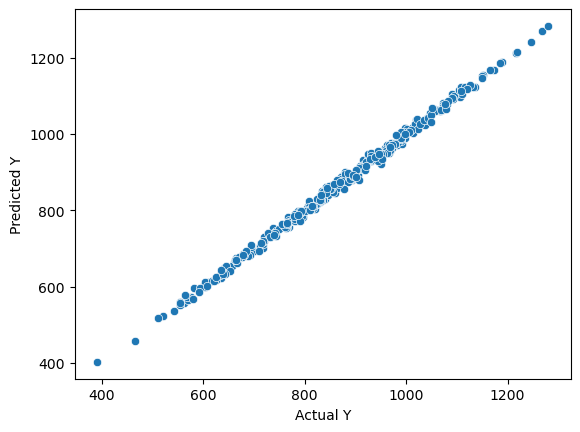

In [12]:
testPredictions = pd.Series(testPredictions.reshape(330,))
predictionDf = pd.concat([predictionDf, testPredictions], axis=1)
predictionDf.columns = ["Actual Y", "Predicted Y"]
print(predictionDf)
sbn.scatterplot(x="Actual Y", y="Predicted Y", data=predictionDf)
plt.show()

## Calculate and print Mean Absolute Error and Mean Squared Error

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(predictionDf["Actual Y"], predictionDf["Predicted Y"]))
print(mean_squared_error(predictionDf["Actual Y"], predictionDf["Predicted Y"]))

6.983248885286455
76.51508481497343


## Predict new bike features

In [14]:
newBikeFeatures = [[1751, 1750]]
newBikeFeatures = scaler.transform(newBikeFeatures)
model.predict(newBikeFeatures)

array([[914.9212]], dtype=float32)

## Reload and use the saved model

In [15]:
from tensorflow.python.keras.models import load_model
model.save("bike_model.h5")
loadedModel = load_model("bike_model.h5")
loadedModel.predict(newBikeFeatures)

array([[914.9212]], dtype=float32)